# 🐸 파이썬으로 데이터 주무르기 

## 7장 시계열 데이터를 다뤄보자

일자: 2020-05-27 ~

- 페이스북에서 만든 fbprophet 활용 
* pip install pandas_datareader
* conda install -c conda-forge fbprophet


In [8]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [9]:
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [11]:
pinkwink_web = pd.read_csv('08. PinkWink Web Traffic.csv',
                          encoding='utf-8', thousands=',',
                          names = ['date', 'hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


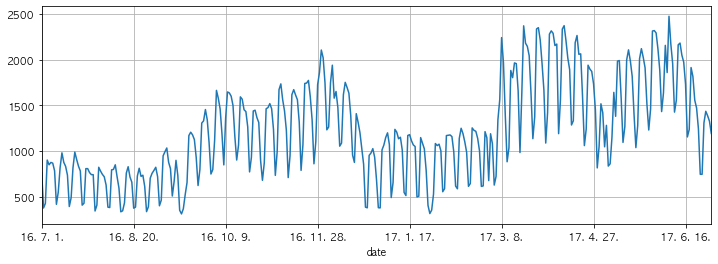

In [14]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True)

- 2016년 7월 1일부터 2017년 6월 16일까지 유입량 판단하기 

In [17]:
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web['hit'].values 

# 0부터 제일 마지막까지 1000개 
fx = np.linspace(0, time[-1], 1000)

- 회귀: 1차, 2차, 3차 15차 다항식으로 표현
- np.polyfit(x, y, n): x는 x에 들어갈 데이터, y는 y에 들어갈 데이터, n는 다항식의 차수 / **n차 다항식으로 회귀분석을 할 때 사용하는 함수**

In [20]:
def error(f,x,y):
    return np.sqrt(np.mean((f(x)-y)**2)) # 오차(에러) 표현

In [21]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

